## Base dados : Atracações

- Atracações de Carga : http://dados.gov.br/dataset/movimentacao-carga
- Periodo da base : Janeiro de 2020 a Março de 2020 <br><br>
Acessado em 5/7/2020, atualizados em 4/6/2020



In [13]:
import pandas as pd
%matplotlib inline

In [4]:
atracacao = pd.read_csv('data/2020Atracacao.txt', header = 0, sep= ';')

In [5]:
atracacao.head(2)

,IDAtracacao,CDTUP,IDBerco,Berço,Porto Atracação,Apelido Instalação Portuária,Complexo Portuário,Tipo da Autoridade Portuária,Data Atracação,Data Chegada,...,Tipo de Navegação da Atracação,Nacionalidade do Armador,FlagMCOperacaoAtracacao,Terminal,Município,UF,SGUF,Região Geográfica,Nº da Capitania,Nº do IMO
0,1068728,BRIBB,IBB0002,Berço 2,Imbituba,NaN,Imbituba,Porto Público,16/03/2020 09:15:00,16/03/2020 09:00:00,...,Apoio Marítimo,0,1,Cais Público,Imbituba,Santa Catarina,SC,Sul,NaN,NaN
1,1057154,BRREC,RECA-05,RECA-05,Recife,Arrecife dos Navios,Suape - Recife,Porto Público,31/12/2019 12:00:00,29/12/2019 09:00:00,...,Cabotagem,0,1,Armazém 05,Recife,Pernambuco,PE,Nordeste,NaN,NaN


### 0. Portos no Brasil

In [9]:
portos = atracacao['Porto Atracação'].value_counts()

#### 0.1 Quantidade de portos : 173

In [10]:
portos.shape

(173,)

#### 0.1 Distribuição dos portos por quantidade de atracação

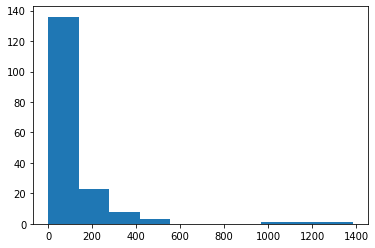

In [15]:
portos.hist(grid = False)

#### 0.1 Portos com mais atracações

In [22]:
base = pd.DataFrame(portos.head(10).reset_index())
base.columns = ['Porto','Quantidade de Atracações']
base

,Porto,Quantidade de Atracações
0,Belém,1385
1,Santarém,1114
2,Santos,1041
3,Rio Grande,508
4,Paranaguá,474
5,Porto Velho,434
6,Terminal de Expedição de Grãos Portochuelo,416
7,Suape,388
8,Terminais Fluviais do Brasil,346
9,Areia Branca,335


### 1. Tipo de Operação

In [30]:
base = atracacao['Tipo de Operação'].value_counts().reset_index()
base.columns = ['Tipo de Operação','Quantidade de Atracações']
base

,Tipo de Operação,Quantidade de Atracações
0,Movimentação da Carga,13291
1,Apoio,2056
2,Passageiro,1317
3,Abastecimento,232
4,Reparo/Manutenção,166
5,Misto,104
6,Marinha,51


### 2. Tipo de Navegação da Atracação

In [31]:
base = atracacao['Tipo de Navegação da Atracação'].value_counts().reset_index()
base.columns = ['Tipo de Navegação da Atracação','Quantidade de Atracações']
base

,Tipo de Navegação da Atracação,Quantidade de Atracações
0,Interior,8345
1,Longo Curso,4745
2,Cabotagem,2440
3,Apoio Portuário,1075
4,Apoio Marítimo,612


### 3. Tipo de Navegação da Atracação

In [32]:
base = atracacao['Nacionalidade do Armador'].value_counts().reset_index()
base.columns = ['Nacionalidade do Armador','Quantidade de Atracações']
base

,Nacionalidade do Armador,Quantidade de Atracações
0,1,11799
1,2,5372
2,0,46


### 4. Terminal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000154663AF8C8>]],
      dtype=object)

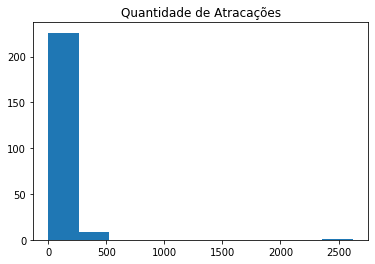

In [35]:
base = atracacao['Terminal'].value_counts().reset_index()
base.columns = ['Terminal','Quantidade de Atracações']
base.hist(grid = False)

### 5. Região Geográfica

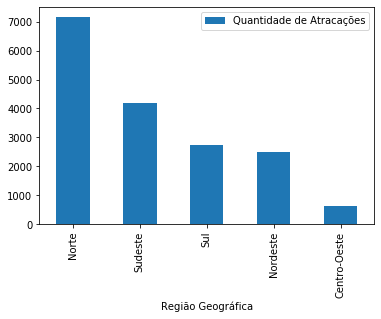

In [43]:
base = atracacao['Região Geográfica'].value_counts().reset_index()
base.columns = ['Região Geográfica','Quantidade de Atracações']
base[['Região Geográfica','Quantidade de Atracações']].plot.bar(x = 'Região Geográfica',y='Quantidade de Atracações')

In [44]:
base

,Região Geográfica,Quantidade de Atracações
0,Norte,7159
1,Sudeste,4183
2,Sul,2739
3,Nordeste,2499
4,Centro-Oeste,637


### 6. Número da Capitania

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001546767AD48>]],
      dtype=object)

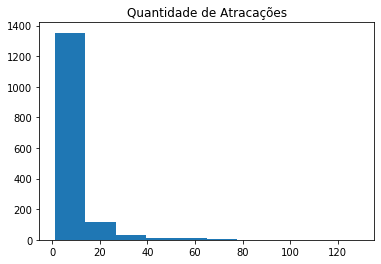

In [48]:
base = atracacao['Nº da Capitania'].value_counts().reset_index()
base.columns = ['Nº da Capitania','Quantidade de Atracações']
base.hist(grid = False)

### 8. Renomeando e filtrando Colunas

In [66]:
## Filtro de colunas a serem utilizadas
filtro_col  = ['IDAtracacao', 'CDTUP', 'IDBerco', 'Porto Atracação','Tipo da Autoridade Portuária', 
               'Data Atracação', 'Data Chegada','Data Desatracação', 'Data Início Operação', 'Data Término Operação',
               'Ano', 'Mes', 'Tipo de Operação', 'Tipo de Navegação da Atracação',
               'Nacionalidade do Armador', 'Terminal','Município',
               'UF', 'SGUF', 'Região Geográfica', 'Nº da Capitania','Nº do IMO']

In [67]:
atracacao_filtro = atracacao[filtro_col]

In [68]:
nome_col = ['id_aAtracacao', 'CDTUP', 'id_berço', 'porto','autoridade_portuaria', 
            'dt_atracacao', 'dt_chegada','dt_desatracacao', 'dt_ini_operacao', 'dt_fim_operacao',
            'ano','mes','tipo_oper', 'tipo_nav_oper','nacion_armador', 'terminal', 'município',
            'uf', 'sguf', 'reg_geografica', 'no_capitania','no_imo']

In [69]:
atracacao_filtro.columns = nome_col

### 9. Filtro das atrações do Porto de Santos para Amostra

In [70]:
atracacao_santos = atracacao_filtro[atracacao_filtro['porto']=='Santos']

In [71]:
atracacao_santos.head(2)

,id_aAtracacao,CDTUP,id_berço,porto,autoridade_portuaria,dt_atracacao,dt_chegada,dt_desatracacao,dt_ini_operacao,dt_fim_operacao,...,tipo_oper,tipo_nav_oper,nacion_armador,terminal,município,uf,sguf,reg_geografica,no_capitania,no_imo
990,1056367,BRSSZ,SSZ0811,Santos,Porto Público,19/01/2020 11:30:00,19/01/2020 10:00:00,20/01/2020 22:10:00,19/01/2020 12:35:00,20/01/2020 03:24:00,...,Movimentação da Carga,Cabotagem,1,Santos Brasil,Guarujá,São Paulo,SP,Sudeste,381E011291,9283227.0
992,1056188,BRSSZ,SSZ0813,Santos,Porto Público,16/01/2020 13:40:00,16/01/2020 07:00:00,17/01/2020 08:45:00,16/01/2020 15:16:00,17/01/2020 06:11:00,...,Movimentação da Carga,Cabotagem,1,Santos Brasil,Guarujá,São Paulo,SP,Sudeste,381E011291,9283227.0


#### 9.1 Diferença de tempo da chegada do navio  ate a atracação

In [73]:
atracacao_santos[['dt_chegada','dt_atracacao']]

,dt_chegada,dt_atracacao
990,19/01/2020 10:00:00,19/01/2020 11:30:00
992,16/01/2020 07:00:00,16/01/2020 13:40:00
1017,24/01/2020 06:00:00,24/01/2020 07:05:00
1018,09/02/2020 07:00:00,09/02/2020 08:05:00
1023,12/01/2020 07:30:00,12/01/2020 08:30:00
...,...,...
16982,05/03/2020 07:28:00,09/03/2020 05:35:00
16983,05/03/2020 11:45:00,14/03/2020 21:00:00
16999,25/02/2020 03:00:00,01/03/2020 05:55:00
17000,01/03/2020 14:49:00,10/03/2020 22:45:00


#### 9.2 Diferença de tempo da chegada do navio  ate Inicio da Operação

#### 9.3 Diferença de tempo da chegada do navio  ate Desatracação

#### 9.4 Diferença de tempo da chegada do navio  ate Fim da Operação

#### 9.5 Diferença de tempo do inicio da Operação e Fim da Operação

#### 9.6 Tempo Médio de Ocupação dos Berços

#### 9.7 Tempo Médio que o Berço fica livre (Entre uma operação e outra)

### 10. Export da Base Amostral de Santos